In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [3]:
# make data

signals = np.random.uniform(-1., 1., 5000)

X = []  # input
y = []  # output

n_steps = 100
n_predicts = 1
for i in range(0, len(signals) - n_steps - n_predicts):
    X.append(signals[i:i + n_steps])
    y.append(np.sum(signals[i:i + n_steps]))

X = np.array(X)
y = np.array(y)

In [4]:
yscaler = MinMaxScaler(feature_range=(-1, 1))
yscaler.fit(y.reshape(1, -1))

MinMaxScaler(feature_range=(-1, 1))

In [5]:
y_scaled = yscaler.transform(y.reshape(1, -1))

In [6]:
y_scaled = y_scaled.reshape(-1,)

In [7]:
y_scaled.shape

(4899,)

In [8]:
# make tensor-like data

X = X.reshape(X.shape[0], X.shape[1], 1)

In [9]:
# make dataset

X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.10, random_state=2023)


print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)


Training Shape : (4409, 100, 1) (4409,)
Testing Shape : (490, 100, 1) (490,)


In [10]:
model = Sequential()
model.add(LSTM(10, activation='tanh', input_shape=(100, 1), return_sequences=True))
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 10)           480       
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [17]:
es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, baseline=1e-10)
history = model.fit(
    X_train, y_train, epochs=200, verbose=1, callbacks=[es],
    validation_data=(X_test, y_test),
)

Epoch 1/200
138/138 [==============================] - 15s 74ms/step - loss: 0.1487 - val_loss: 8.0021e-05
Epoch 2/200
138/138 [==============================] - 12s 87ms/step - loss: 6.1614e-05 - val_loss: 4.6437e-05
Epoch 3/200
138/138 [==============================] - 11s 83ms/step - loss: 3.6386e-05 - val_loss: 2.8303e-05
Epoch 4/200
138/138 [==============================] - 11s 76ms/step - loss: 2.2975e-05 - val_loss: 1.8608e-05
Epoch 5/200
138/138 [==============================] - 9s 67ms/step - loss: 1.5606e-05 - val_loss: 1.3081e-05
Epoch 6/200
138/138 [==============================] - 10s 74ms/step - loss: 1.1268e-05 - val_loss: 9.7053e-06
Epoch 7/200
138/138 [==============================] - 12s 90ms/step - loss: 8.5365e-06 - val_loss: 7.5082e-06
Epoch 8/200
138/138 [==============================] - 11s 80ms/step - loss: 6.7125e-06 - val_loss: 5.9996e-06
Epoch 9/200
138/138 [==============================] - 9s 65ms/step - loss: 5.4338e-06 - val_loss: 4.9197e-06
Epoch 1

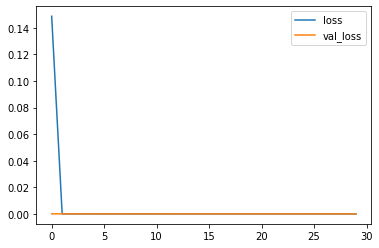

In [19]:

# show history
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")

plt.legend(loc="upper right")
plt.show()

In [20]:
X.shape

(4899, 100, 1)

In [14]:
y_pred_scaled = model.predict(X)


2023-02-13 15:51:21.970761: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


154/154 [==============================] - 1s 3ms/step


In [15]:
y_pred_scaled.shape

(4899, 1)

In [16]:
y_pred = yscaler.inverse_transform(y_pred_scaled.reshape(1, -1))


In [17]:
y_pred = y_pred.reshape(-1,)

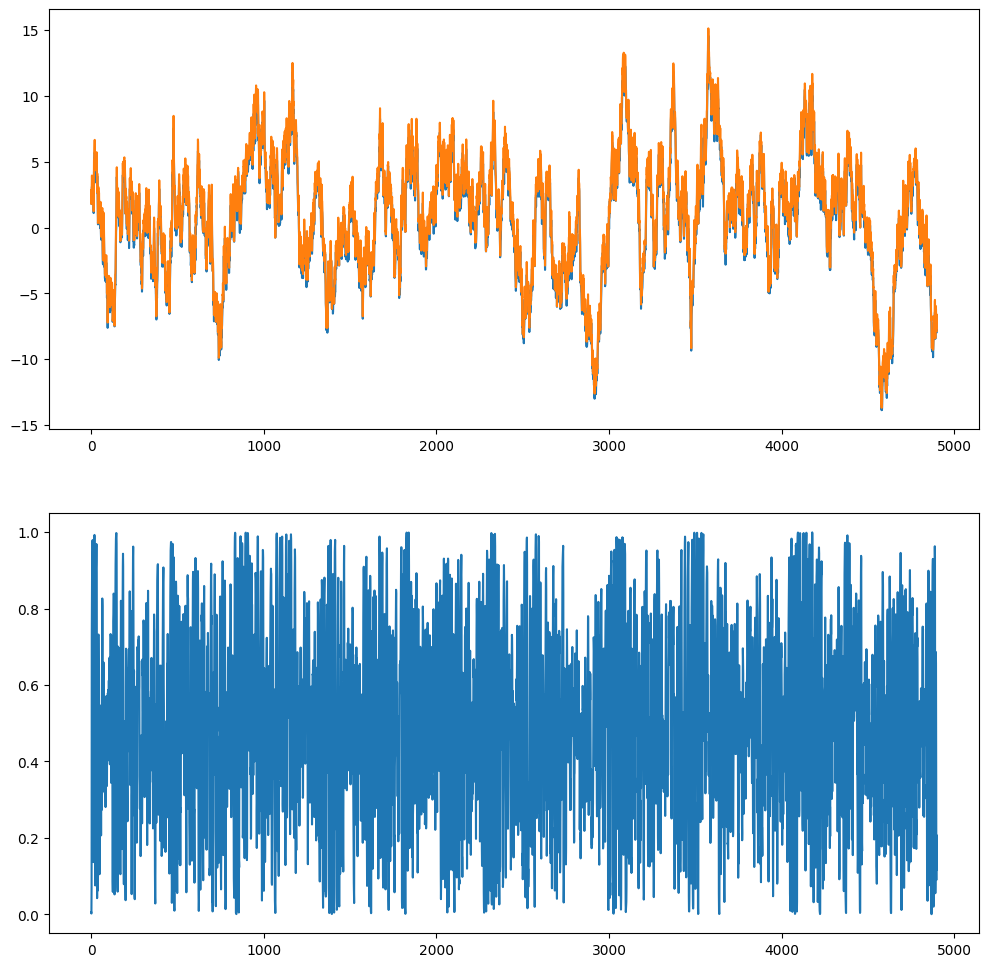

In [18]:
plt.figure(figsize=[12,12])
plt.subplot(2, 1, 1)
plt.plot(y)
plt.plot(y_pred)
plt.subplot(2, 1, 2)
plt.plot(y_pred - y)
plt.show()

In [12]:
# save model
import os
model_name = 'LSTM_predict_sum_from_signals'
model_version = 'layer_10_10'
model_path = os.path.join(os.getcwd().split('notebooks')[0], 'models', model_name, model_version)
print(model_path)
# model.save(model_path)

/Users/a12319/PycharmProjects/accidentdetection_lv2/models/LSTM_chirp_signal/layer_10_10


In [13]:
## load model
model = tf.keras.models.load_model(model_path)